<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/Week5(3_2_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bai toan tinh tien tip

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=788af0ce3c64371b164ac862a7279982d91284e8c139a1fb15abed05b623b359
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
universe = np.linspace(0, 10, 61)     #tu dong ve membership
universe1 = np.linspace(10, 30, 61)
food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
tip = ctrl.Consequent(universe1, 'tip')
names = ['Very Poor', 'Poor', 'AV', 'Good', 'Very Good']
names_tip = ['Very Less', 'Less', 'AV', 'Very Much', 'Much']
food.automf(names = names)
service.automf(names = names)
tip.automf(names = names_tip)

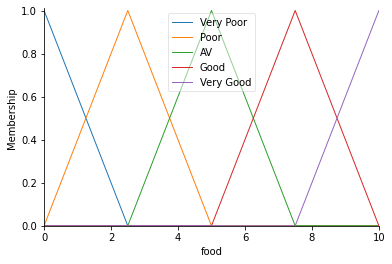

In [ ]:
food.view()

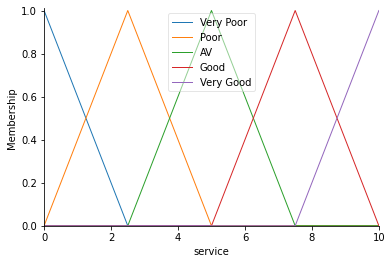

In [ ]:
service.view()

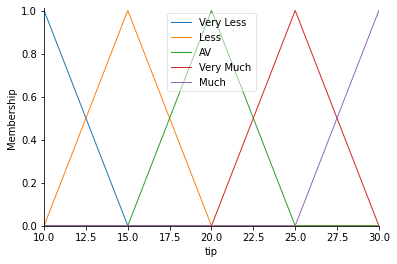

In [ ]:
tip.view()

In [ ]:
rule0 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['Very Poor'])| 
                                (food['Poor'] & service['Very Poor'])| 
                                (food['Very Poor'] & service['Poor'])), 
                                consequent = tip['Very Less'], label = 'Rule Very Poor')
#----------------------------------------------------------------------------------------------------------
rule1 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['AV'])|
                                (food['Very Poor'] & service['Good'])|
                                (food['Good'] & service['Very Poor'])| 
                                (food['Poor'] & service['Poor'])| 
                                (food['Poor'] & service['AV'])|
                                (food['AV'] & service['Very Poor'])|
                                (food['AV'] & service['Poor'])), 
                                consequent = tip['Less'], label = 'Rule Poor')
#-----------------------------------------------------------------------------------------------------------
rule2 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['Very Good'])| 
                                (food['Poor'] & service['Good'])| 
                                (food['AV'] & service['AV'])|
                                (food['Good'] & service['Poor'])|
                                (food['Very Good'] & service['Very Poor'])), 
                                consequent = tip['AV'], label = 'Rule AV')
#-----------------------------------------------------------------------------------------------------------
rule3 = ctrl.Rule(antecedent = ((food['Poor'] & service['Very Good'])| 
                                (food['AV'] & service['Good'])| 
                                (food['AV'] & service['Very Good'])|
                                (food['Good'] & service['AV'])|
                                (food['Good'] & service['Good'])|
                                (food['Very Good'] & service['Poor'])|
                                (food['Very Good'] & service['AV'])), 
                                consequent = tip['Much'], label = 'Rule Much')
#----------------------------------------------------------------------------------------------------------
rule4 = ctrl.Rule(antecedent = ((food['Good'] & service['Very Good'])| 
                                (food['Very Good'] & service['Good'])| 
                                (food['Very Good'] & service['Very Good'])), 
                                consequent = tip['Very Much'], label = 'Rule Very Good')

<ipython-input-53-7d6b637a3ba5>:17: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-53-7d6b637a3ba5>:18: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-53-7d6b637a3ba5>:19: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


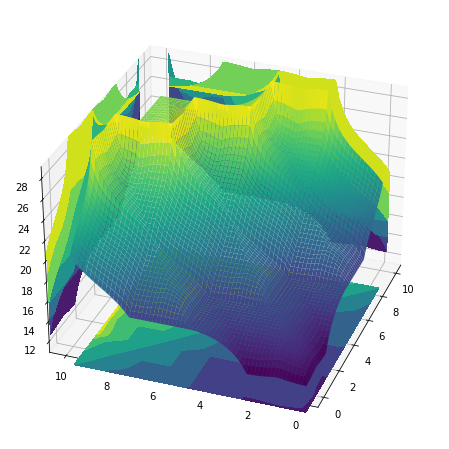

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl, flush_after_run = 61 * 61 + 1)
upsampled = np.linspace(0, 10, 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    tipping.input['food'] = x[i, j]
    tipping.input['service'] = y[i, j]
    tipping.compute()
    z[i, j] = tipping.output['tip']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 200)


# Bai toan dieu khien con lac nguoc

<ipython-input-9-c9506bdefdb5>:71: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-9-c9506bdefdb5>:72: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-9-c9506bdefdb5>:73: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


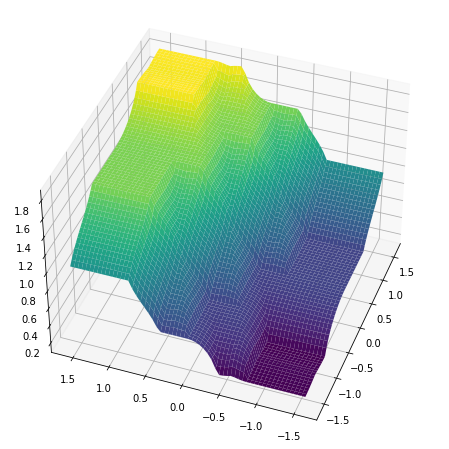

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

universe = np.linspace(-(math.pi/2), (math.pi/2), 61)
universe2 = np.linspace(-(math.pi/4), (math.pi/4), 61)
universe1 = np.linspace(0, 2, 61)
alpha = ctrl.Antecedent(universe, 'alpha')
d_alpha = ctrl.Antecedent(universe2, 'd_alpha')
force = ctrl.Consequent(universe1, 'force')
names = ['LN', 'N', 'ZE', 'P', 'LP']
names_force = ['Very Less', 'Less', 'AV', 'Much', 'Very Much']
alpha.automf(names = names)
d_alpha.automf(names = names)
force.automf(names = names_force)

rule0 = ctrl.Rule(antecedent = ((alpha['LN'] & d_alpha['LN'])| 
                                (alpha['N'] & d_alpha['LN'])| 
                                (alpha['LN'] & d_alpha['N'])), 
                                consequent = force['Very Less'], label = 'Rule LN')
#----------------------------------------------------------------------------------------------------------
rule1 = ctrl.Rule(antecedent = ((alpha['LN'] & d_alpha['ZE'])|
                                (alpha['LN'] & d_alpha['P'])|
                                (alpha['P'] & d_alpha['LN'])| 
                                (alpha['N'] & d_alpha['N'])| 
                                (alpha['N'] & d_alpha['ZE'])|
                                (alpha['ZE'] & d_alpha['LN'])|
                                (alpha['ZE'] & d_alpha['N'])), 
                                consequent = force['Less'], label = 'Rule N')
#-----------------------------------------------------------------------------------------------------------
rule2 = ctrl.Rule(antecedent = ((alpha['LN'] & d_alpha['LP'])| 
                                (alpha['N'] & d_alpha['P'])| 
                                (alpha['ZE'] & d_alpha['ZE'])|
                                (alpha['P'] & d_alpha['N'])|
                                (alpha['LP'] & d_alpha['LN'])), 
                                consequent = force['AV'], label = 'Rule ZE')
#-----------------------------------------------------------------------------------------------------------
rule3 = ctrl.Rule(antecedent = ((alpha['N'] & d_alpha['LP'])| 
                                (alpha['ZE'] & d_alpha['P'])| 
                                (alpha['ZE'] & d_alpha['LP'])|
                                (alpha['P'] & d_alpha['ZE'])|
                                (alpha['P'] & d_alpha['P'])|
                                (alpha['LP'] & d_alpha['N'])|
                                (alpha['LP'] & d_alpha['ZE'])), 
                                consequent = force['Much'], label = 'Rule Much')
#----------------------------------------------------------------------------------------------------------
rule4 = ctrl.Rule(antecedent = ((alpha['P'] & d_alpha['LP'])| 
                                (alpha['LP'] & d_alpha['P'])| 
                                (alpha['LP'] & d_alpha['LP'])), 
                                consequent = force['Very Much'], label = 'Rule LP')

forceping_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
forceping = ctrl.ControlSystemSimulation(forceping_ctrl, flush_after_run = 61 * 61 + 1)
upsampled = np.linspace(-(math.pi/2), (math.pi/2), 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    forceping.input['alpha'] = x[i, j]
    forceping.input['d_alpha'] = y[i, j]
    forceping.compute()
    z[i, j] = forceping.output['force']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(40, 200)